# Experience Salary Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Experience-Salary.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [4]:
print(df.describe())

       exp(in months)  salary(in thousands)
count     1000.000000           1000.000000
mean        26.157825             26.722597
std          8.717091              8.844761
min          0.697594             -1.276342
25%         20.073600             20.531008
50%         25.875225             26.745576
75%         32.406986             32.615753
max         49.463222             55.297016


In [5]:
print("\nValores Nulos por Coluna:")
print(df.isnull().sum())

print("\nValores Duplicados:")
print(df.duplicated().sum())


Valores Nulos por Coluna:
exp(in months)          0
salary(in thousands)    0
dtype: int64

Valores Duplicados:
0


In [6]:
# Filtrando apenas os salários positivos

print(f"Registros antes da remoção: {len(df)}")
print(f"Menor salário antes: {df['salary(in thousands)'].min()}")

# Remover registros com salários negativos e NaN
df = df[(df['salary(in thousands)'] >= 0) & (df['salary(in thousands)'].notna())]

print(f"\nRegistros após remoção: {len(df)}")
print(f"Menor salário após: {df['salary(in thousands)'].min()}")

Registros antes da remoção: 1000
Menor salário antes: -1.2763422707877368

Registros após remoção: 998
Menor salário após: 2.8329757463526697


In [7]:
correlacao = df['exp(in months)'].corr(df['salary(in thousands)'])
print(f"Correlação: {correlacao:.2f}")

Correlação: 0.81


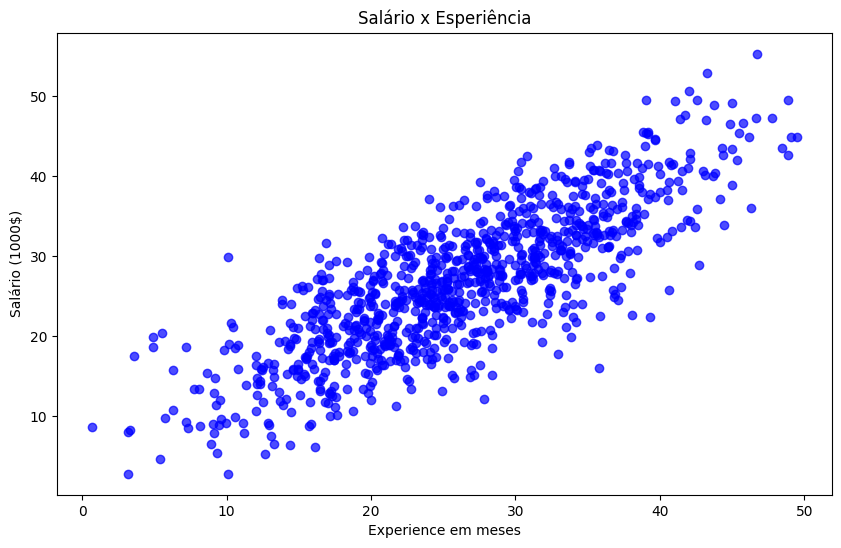

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['exp(in months)'], df['salary(in thousands)'], color='blue', alpha=0.7)
plt.xlabel("Experience em meses")
plt.ylabel("Salário (1000$)")
plt.title("Salário x Esperiência")
plt.show()

In [9]:
# Divisão dos Dados
X = df[['exp(in months)']]                # Variável independente
y = df[['salary(in thousands)']]          # Variável dependente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Treinamento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [11]:
# Fazerndo previsões no conjunto de teste
y_pred = modelo.predict(X_test)
resultados = pd.DataFrame({
    'Experiência (meses)': X_test.values.flatten(),
    'Salário Real (mil)': y_test.values.flatten(),
    'Salário Previsto (mil)': y_pred.flatten()
})

print(resultados)

     Experiência (meses)  Salário Real (mil)  Salário Previsto (mil)
0               9.304304           11.432694               12.671673
1              16.603182           17.274353               18.739117
2              37.370093           36.151112               36.002328
3              38.475167           33.872920               36.920958
4              45.011941           43.355878               42.354877
..                   ...                 ...                     ...
195            24.372664           20.115487               25.197767
196            31.541654           34.296492               31.157237
197            35.355270           40.753600               34.327436
198            19.026491           23.388979               20.753577
199            20.239727           27.541038               21.762121

[200 rows x 3 columns]


In [12]:
# Avaliando o Modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMÉTRICAS DE AVALIAÇÃO DO MODELO")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


MÉTRICAS DE AVALIAÇÃO DO MODELO
Erro Quadrático Médio (MSE): 25.66
Coeficiente de Determinação (R²): 0.60


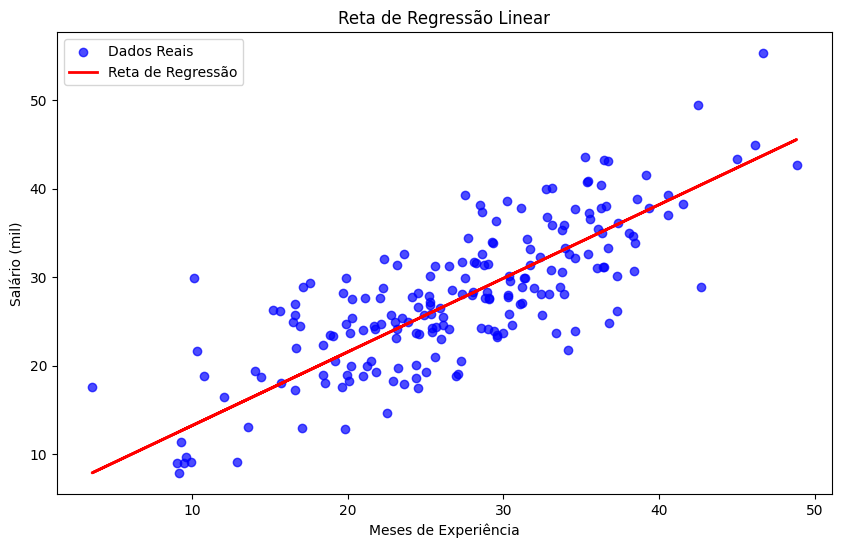

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.7, label="Dados Reais")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Reta de Regressão")
plt.xlabel("Meses de Experiência")
plt.ylabel("Salário (mil)")
plt.title("Reta de Regressão Linear")
plt.legend()
plt.show()